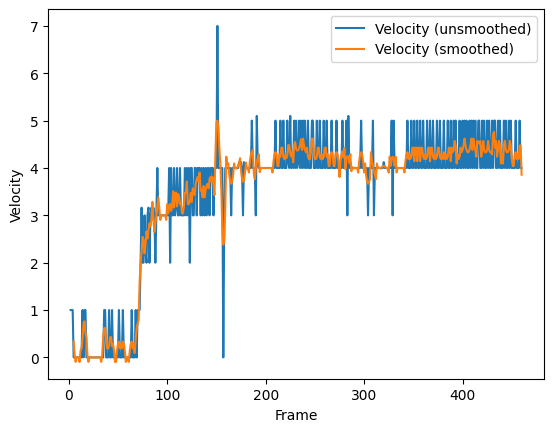

In [3]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Load data into a pandas dataframe
df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

# Compute velocity by differentiating the position
dx = df['x'].diff()
dy = df['y'].diff()
df['velocity'] = np.sqrt(dx**2 + dy**2)

# Smooth the velocity data using a Savitzky-Golay filter
window_size = 7
poly_order = 3
df['smooth_velocity'] = savgol_filter(df['velocity'], window_size, poly_order)

# Plot the velocity data
import matplotlib.pyplot as plt

plt.plot(df['frame'], df['velocity'], label='Velocity (unsmoothed)')
plt.plot(df['frame'], df['smooth_velocity'], label='Velocity (smoothed)')
plt.xlabel('Frame')
plt.ylabel('Velocity')
plt.legend()
plt.show()


/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_20994/1758450047.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled["time"] = df_sampled["frame"].shift(-1) - df_sampled["frame"].shift(-1).iloc[0]
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_20994/1758450047.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled["velocity"] = velocity


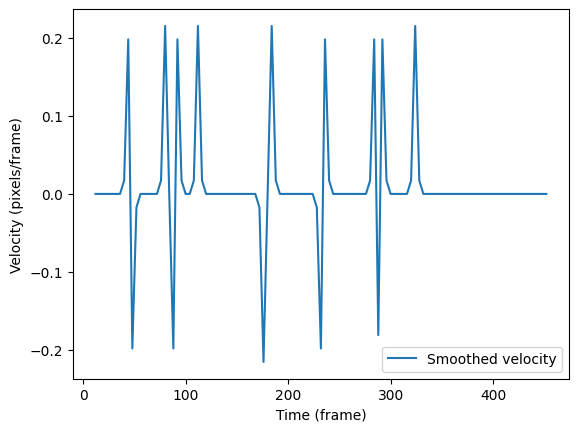

In [31]:
# Sampling every 4th point

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the position data into a pandas DataFrame
df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

# Select every 4th row of the position data
df_sampled = df[::4]

# Calculate the time difference between each pair of consecutive position measurements
time_diff = df_sampled["frame"].diff()

# Calculate the velocity using the difference of position values and the time difference
velocity = df_sampled["y"].diff() / time_diff

# Add a time column to the velocity data
df_sampled["time"] = df_sampled["frame"].shift(-1) - df_sampled["frame"].shift(-1).iloc[0]
df_sampled["velocity"] = velocity

# Remove the NaN value in the first row
df_sampled = df_sampled.dropna()

# Smooth the velocity data using a moving average filter
window_size = 3
df_sampled["smoothed_velocity"] = df_sampled["velocity"].rolling(window=window_size, win_type='hamming').mean()

# Plot the velocity data
plt.plot(df_sampled["time"], df_sampled["smoothed_velocity"], label="Smoothed velocity")
plt.xlabel("Time (frame)")
plt.ylabel("Velocity (pixels/frame)")
plt.legend()
plt.show()


In [22]:
# Making a new file by sampling every 5th point of droplet_posn_time.txt


df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

sample_rate = 10
sampled_df = df[::sample_rate]

# write new_df to a file
with open('droplet_posn_time_sampled.txt', 'w') as f:
    f.write("frame" + ' ' + "x" + ' ' + "y" + ' ' + "width" + ' ' + "height" + ' ' + "deformation" + '\n')
    for frame, x, y, width, height, deformation in zip(sampled_df['frame'], sampled_df['x'], new_df['y'], sampled_df['width'], sampled_df['height'], sampled_df['deformation']):
        f.write(str(frame) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' ' + str(deformation) + '\n')
        
sampled_df

,frame,x,y,width,height,deformation
0,1.0,214,617,45.000000,44.000000,0.011236
10,11.0,213,617,45.000000,46.000000,0.010989
20,21.0,214,617,47.000000,47.000000,0.000000
30,31.0,214,617,45.000000,45.000000,0.000000
40,41.0,214,618,45.000000,46.000000,0.010989
50,51.0,215,617,45.000000,46.000000,0.010989
60,61.0,214,617,46.000000,46.000000,0.000000
70,71.0,218,617,46.000000,45.000000,0.010989
80,81.0,241,618,45.000000,46.000000,0.010989
90,91.0,270,618,45.000000,48.000000,0.032258


/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_20994/1156367972.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['velocity'] = sampled_dx/sample_rate
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_20994/1156367972.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['moving_average_velocity'] = sampled_df['velocity'].rolling(window=5, win_type='hamming').mean()
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_20994/1156367972.py:28: SettingWithCopy

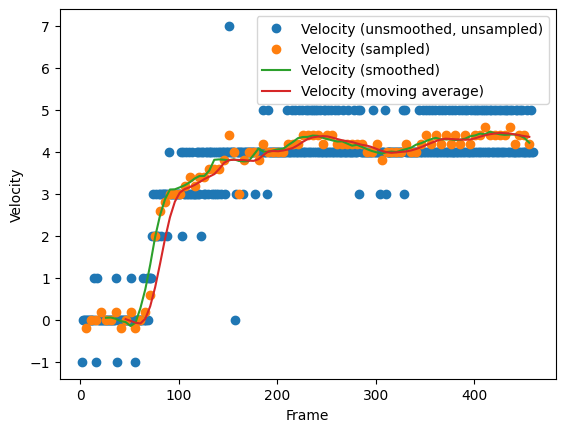

In [50]:
# plot frame vs x from sampled_df

import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])
dx = df['x'].diff()
# dy = df['y'].diff()
# df['velocity'] = np.sqrt(dx**2 + dy**2)
df['velocity'] = dx

sample_rate = 5
sampled_df = df[0::sample_rate]

# Compute velocity by differentiating the position
sampled_dx = sampled_df['x'].diff()
# sampled_dy = sampled_df['y'].diff()
# sampled_df['velocity'] = np.sqrt(sampled_dx**2 + sampled_dy**2)/sample_rate
sampled_df['velocity'] = sampled_dx/sample_rate

sampled_df['moving_average_velocity'] = sampled_df['velocity'].rolling(window=5, win_type='hamming').mean()

# Smooth the velocity data using a Savitzky-Golay filter
window_size = 10
poly_order = 3
sampled_df['smooth_velocity'] = savgol_filter(sampled_df['velocity'], window_size, poly_order)
sampled_df['moving_average_smooth_velocity'] = savgol_filter(sampled_df['moving_average_velocity'], window_size, poly_order)


# Plot the velocity data
import matplotlib.pyplot as plt

# multiplot
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(df['frame'], df['velocity'], label='Velocity (unsmoothed, unsampled)', marker='o', linestyle='None')
plt.plot(sampled_df['frame'], sampled_df['velocity'], label='Velocity (sampled)', marker='o', linestyle='None')
plt.plot(sampled_df['frame'], sampled_df['smooth_velocity'], label='Velocity (smoothed)')
plt.plot(sampled_df['frame'], sampled_df['moving_average_smooth_velocity'], label='Velocity (moving average)')
plt.xlabel('Frame')
plt.ylabel('Velocity')
plt.legend()
plt.show()
